# Adult Census Income Prediction
In this notebook, I seek to predict the income of people based on multiple socio-economic factors, using the Adult Income Census dataset. I will plot several of these factors against income in order to visualize trends and patterns. Finally, I will be using 5 machine learning models in attempts to accurately predict if a person earns a yearly income greater than or less than $50K.
### Machine Learning Models
* XGBclassifier
<a id="top"></a> <br>

### 1. [Preparing Libraries & Data](#1)
### 2. [Cleaning Data](#2)
### 3. [Visualization](#3)
### 4. [Modeling](#4)
### 5. [Model Tuning](#5)
### 6. [Outcome](#6)

<a id="1"></a> <br>
## 1. Preparing Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_context("poster")

dataset = pd.read_csv(r"C:\Users\sanka\DataScience\Class23\MACHINE-LEARNING---VI-1-master\adult.csv")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Setup Complete")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Setup Complete


<a id="2"></a> <br>
## 2. Cleaning Data

In [3]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
dataset.isnull().sum()
#checking for missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
#Object in the case = Text
#Int64 = Numbers
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

<a id="3"></a> <br>
## 3. Visualization

### Barplot of  Workclass vs Income

Text(0.5,0,'Workclass')

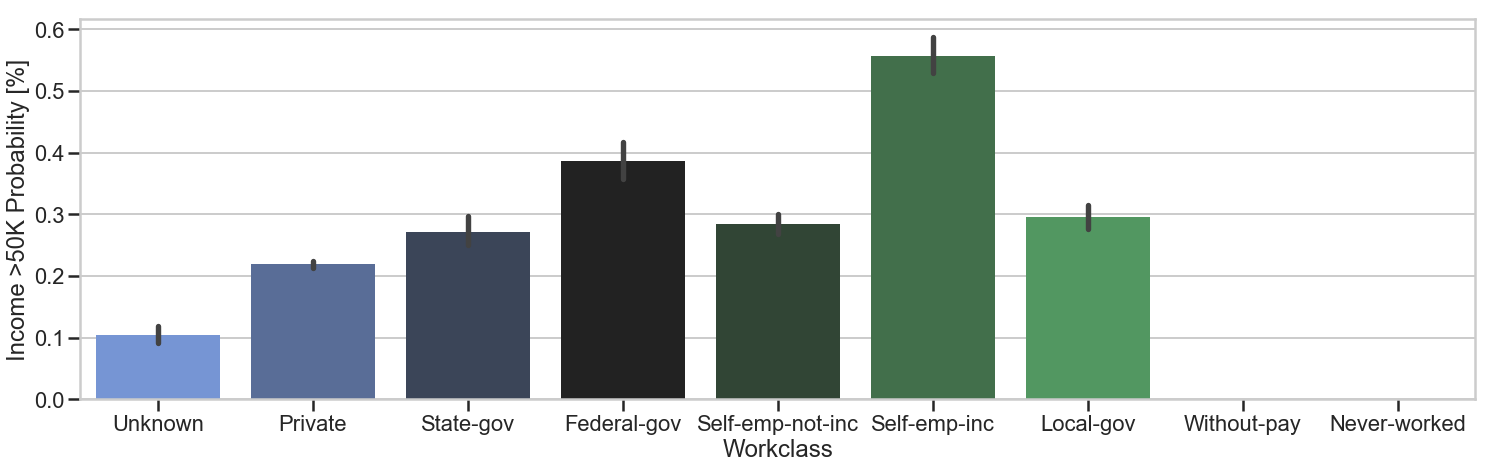

In [6]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset["workclass"] = dataset["workclass"].replace(["?"],'Unknown')
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='workclass',y='income',data=dataset,palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Workclass")

### Barplot of Marital Status vs Income

Text(0.5,0,'Marital Status')

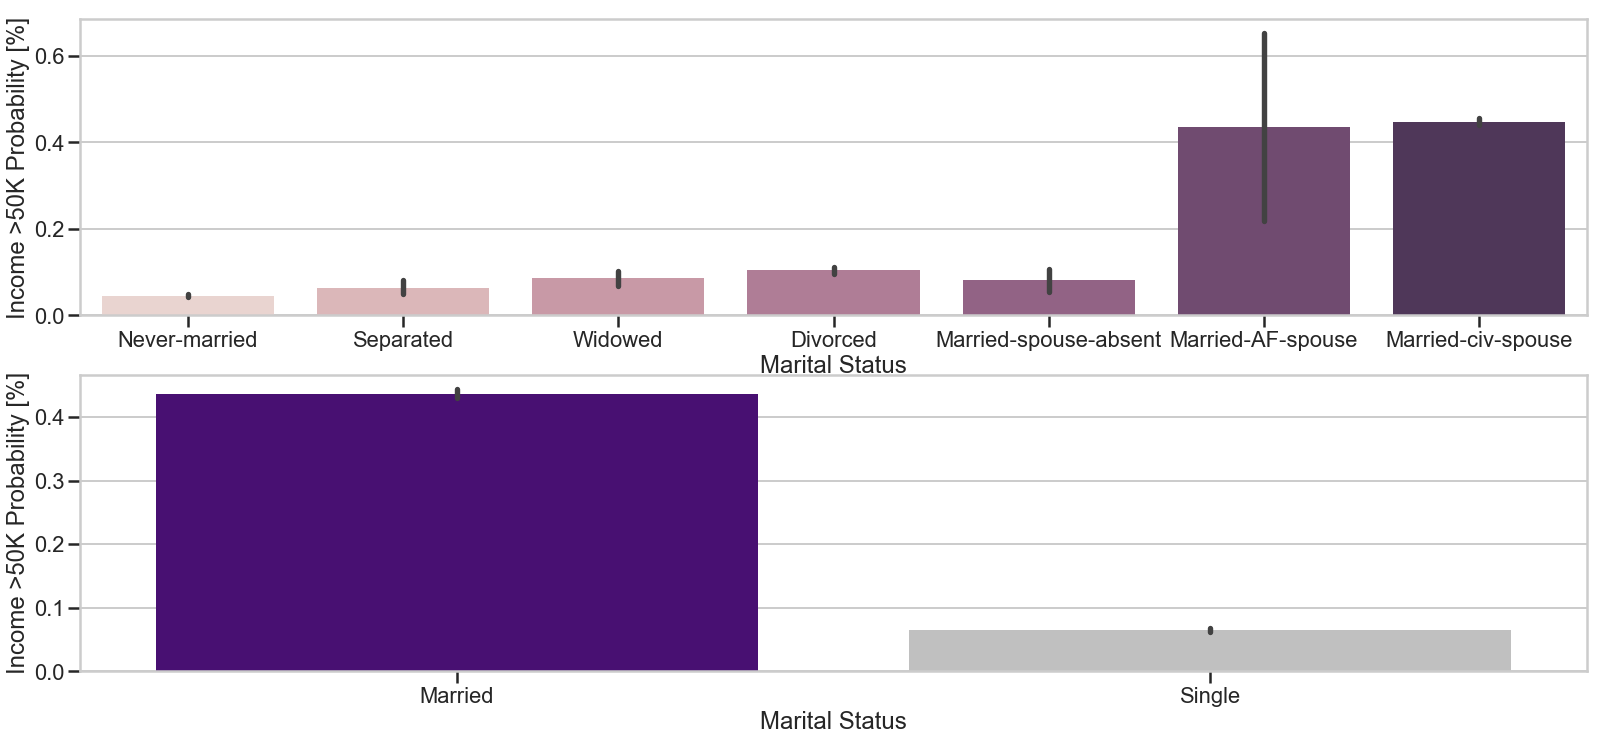

In [7]:
fig, axe = plt.subplots(2,1,figsize=(27,12))
current_palette =sns.cubehelix_palette(8)

fig = sns.barplot(x='marital.status',y='income',data=dataset,ax=axe[0],order =['Never-married','Separated','Widowed','Divorced','Married-spouse-absent','Married-AF-spouse','Married-civ-spouse'],palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")


datasetCopy= dataset.copy()
datasetCopy["marital.status"] = datasetCopy["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], '1')
datasetCopy["marital.status"] = datasetCopy["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], '0')
datasetCopy["marital.status"] = datasetCopy["marital.status"].astype(int)

sns.set_context("poster")
fig = sns.barplot(x='marital.status',y='income',data=datasetCopy,ax=axe[1], order=[1,0],palette=['indigo','silver'])

fig.set(xticklabels =['Married','Single'])
fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")

### Barplot of Relationship vs Income

Text(0.5,0,'Relationship')

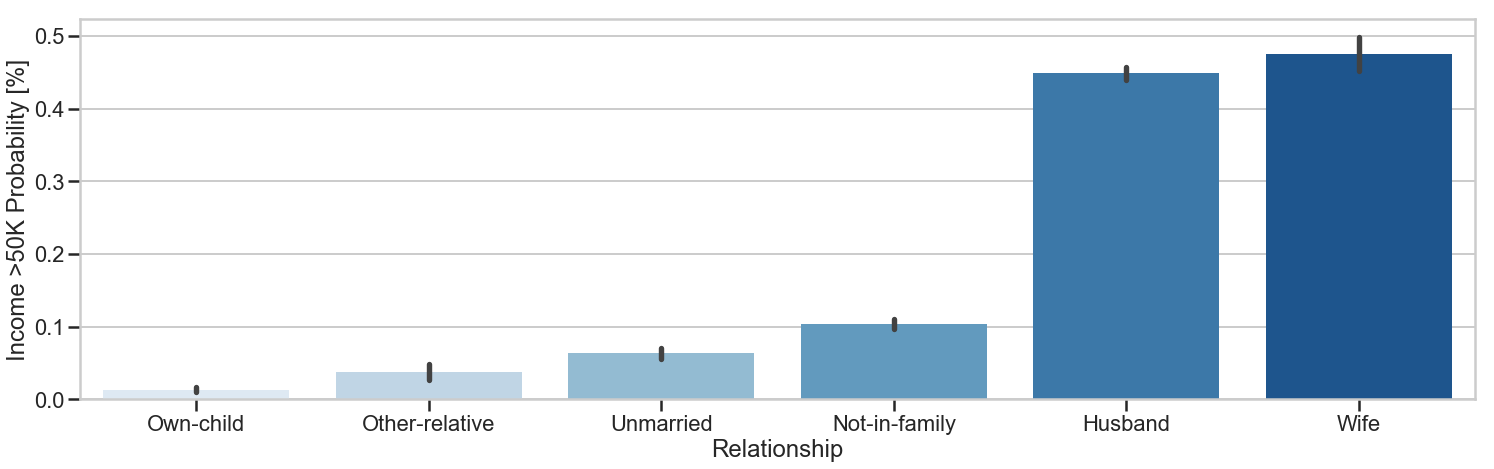

In [8]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.color_palette("Blues")

fig = sns.barplot(x='relationship',y='income',data=dataset, order=['Own-child','Other-relative','Unmarried','Not-in-family','Husband','Wife'], palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Relationship")

### Correlation Matrix for Numeric Data

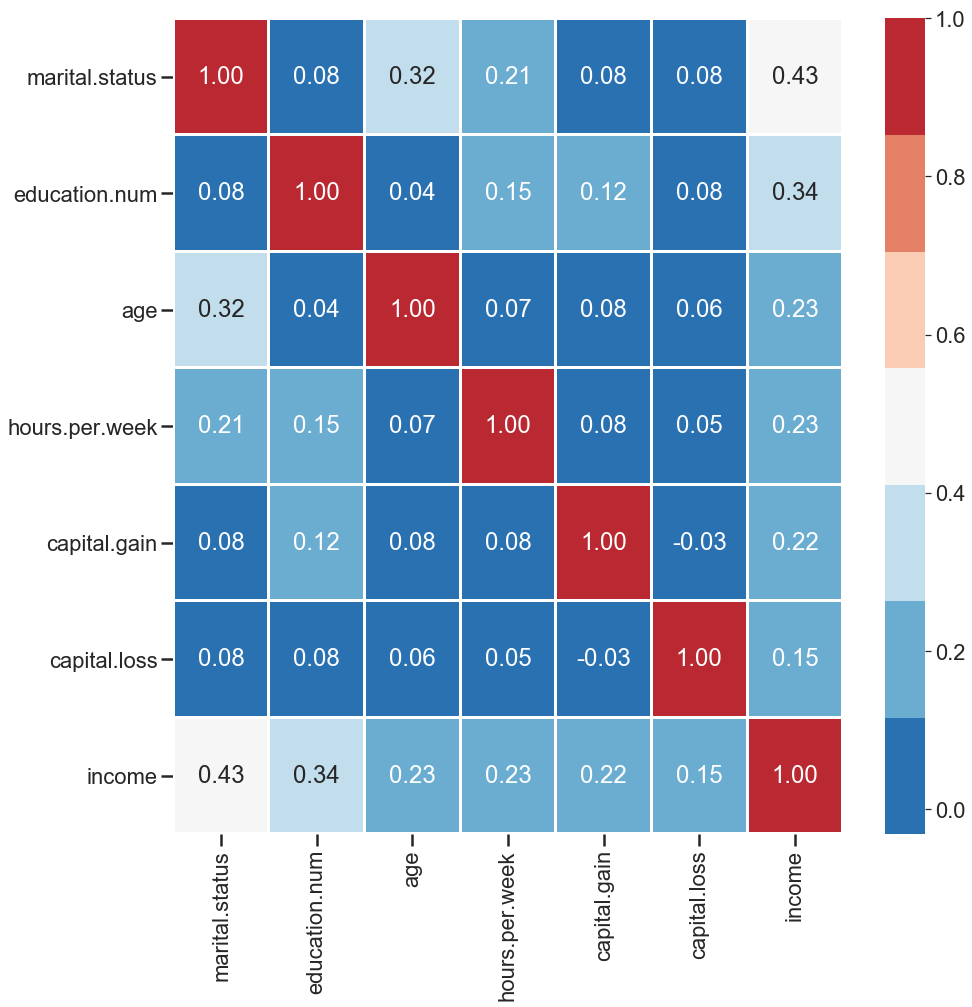

In [9]:
numeric_columns = ['marital.status','education.num','age','hours.per.week','capital.gain','capital.loss','income']

fig, axe = plt.subplots(figsize=(15,15))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(datasetCopy[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

### Violinplot of Age vs Income vs Sex 


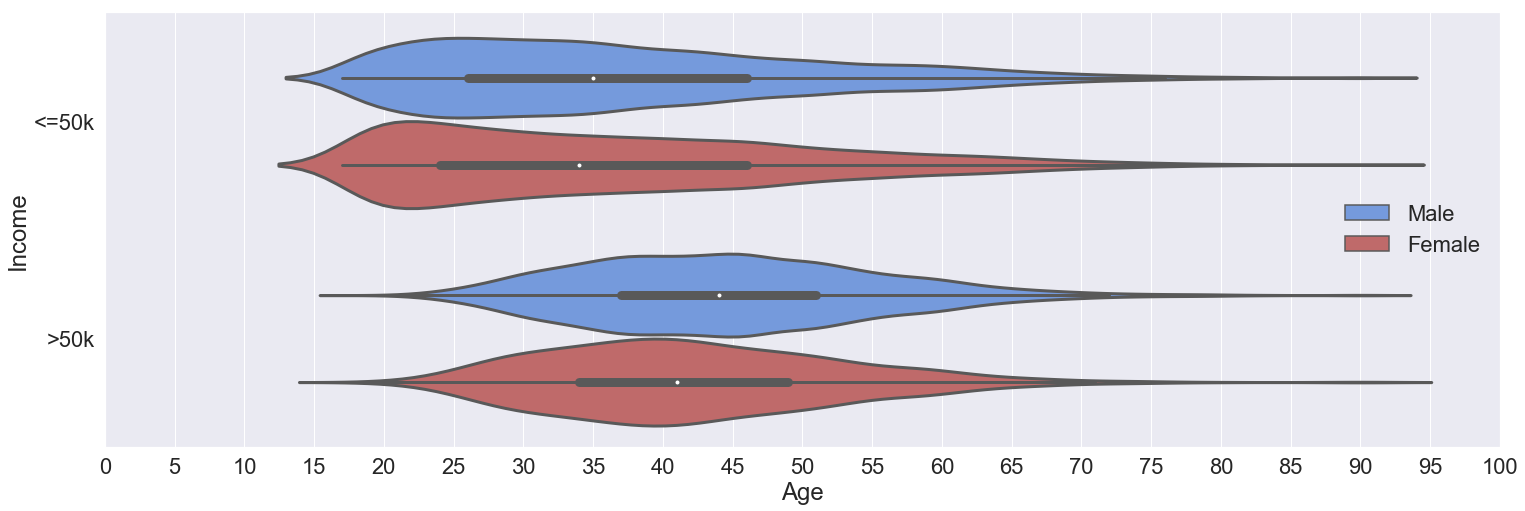

In [10]:
fig, axe = plt.subplots(figsize=(25,8))
sns.set_context("poster")

g=sns.violinplot(x='age',y='income',hue='sex',hue_order=["Male","Female"],data=dataset,orient="h",palette=["cornflowerblue","indianred",])

g.set_ylabel("Income")
g.set_xlabel("Age")
g.set(yticklabels =['<=50k','>50k'])
setThis = g.legend(loc='center right')
plt.xlim(0,100)
axe.xaxis.set_major_locator(ticker.MultipleLocator(5))

### Violinplot of Age vs Marital Status vs Income 

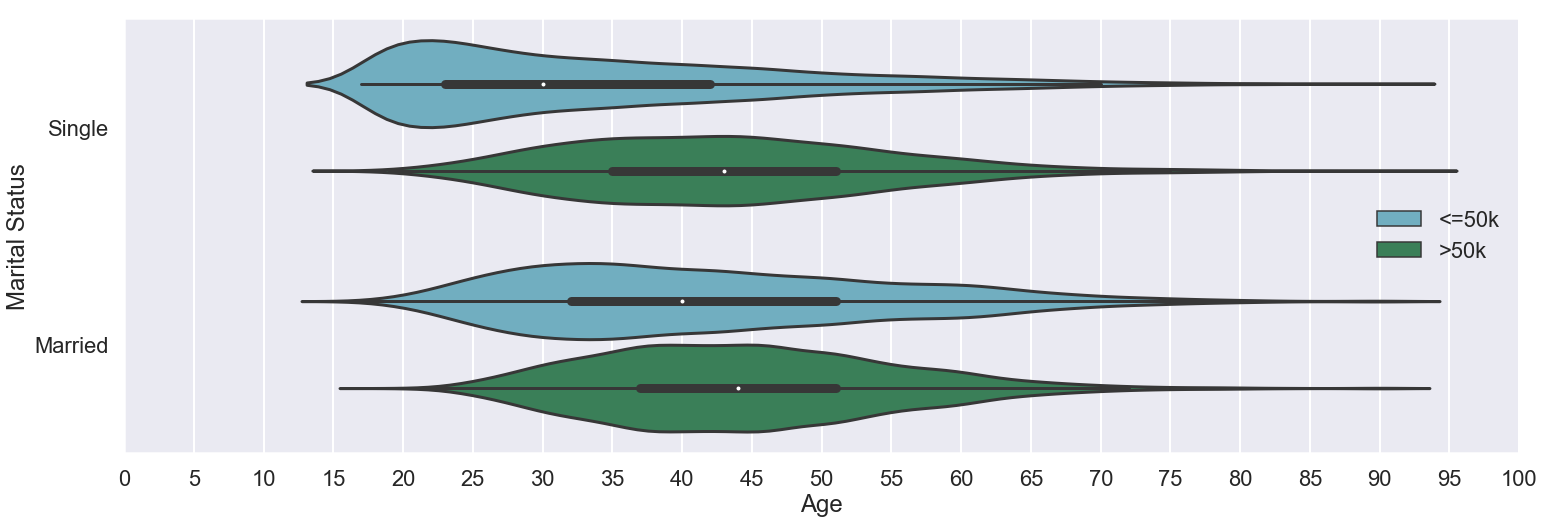

In [11]:
dataset = pd.read_csv(r"C:\Users\sanka\DataScience\Class23\MACHINE-LEARNING---VI-1-master\adult.csv")
fig, axe = plt.subplots(figsize=(25,8))
sns.set_context("poster")

g=sns.violinplot(x='age',y='marital.status',hue='income',data=datasetCopy,orient="h",palette=["c",'seagreen'])

g.set_ylabel("Marital Status")
g.set_xlabel("Age")
setThis = g.legend(loc='center right')
setThis.get_texts()[0].set_text("<=50k")
setThis.get_texts()[1].set_text(">50k")
g.set(yticklabels =['Single','Married'])
plt.xlim(0,100)
axe.xaxis.set_major_locator(ticker.MultipleLocator(5))

### Violinplot/Lineplot Education year vs Age vs Income

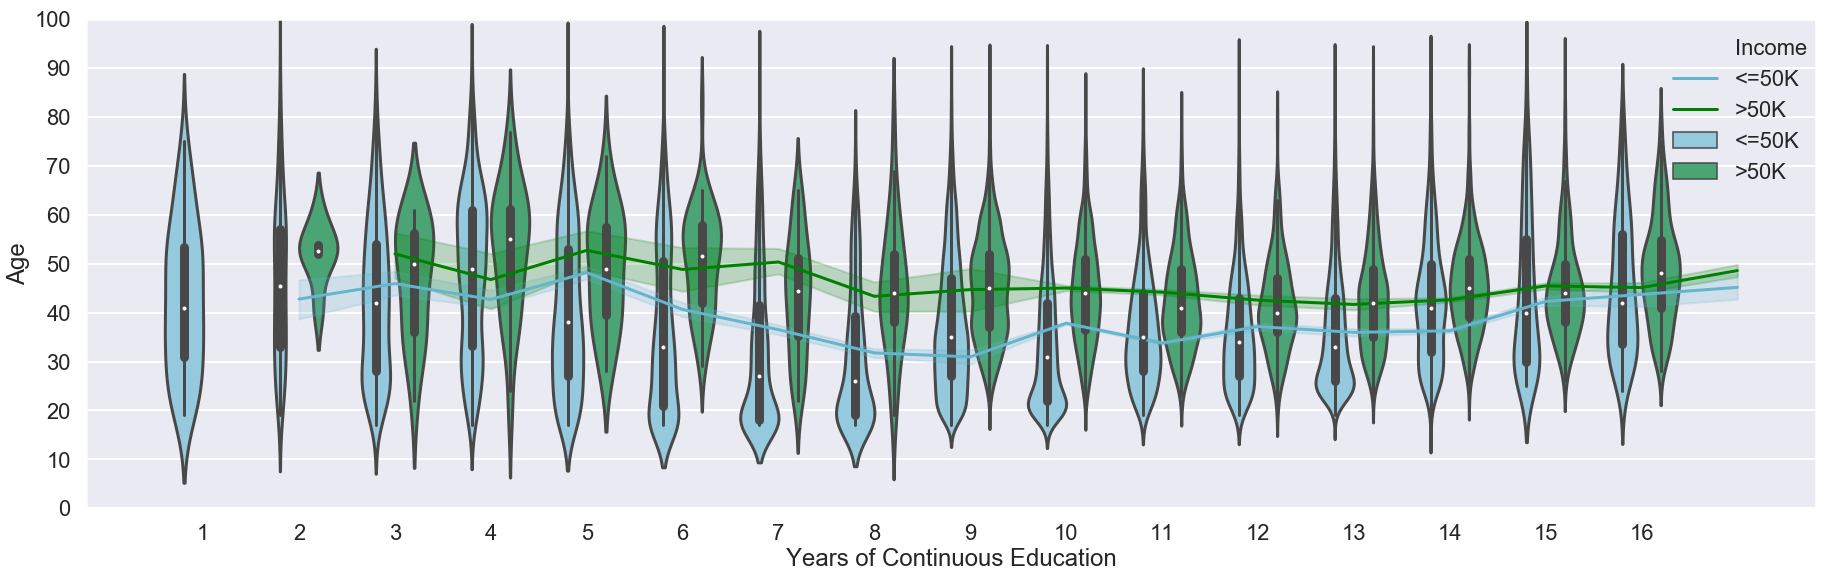

In [12]:
fig, axe = plt.subplots(figsize=(31,9))
sns.set_context("poster")

g=sns.violinplot(x="education.num",y='age',hue='income',data=dataset,palette=["skyblue",'mediumseagreen'],ax = axe)
sns.lineplot(x="education.num",y='age',hue='income',data=dataset,palette=["c",'green'],ax=axe)


plt.ylim(0,100)
g.set_xlabel("Years of Continuous Education")
g.set_ylabel("Age")
setThis = g.legend(bbox_to_anchor=(.906, 1),loc=2)
setThis.get_texts()[0].set_text("Income")
axe.yaxis.set_major_locator(ticker.MultipleLocator(10))

 |Education numbers | Meaning |     
 | -----------------------|:-----------:|
 |1 |preschool|
 |2-8| <HS-grad
 |9|HS-grad|
 |10|some-college|
 |11-12|Associate
 |13|Bachelors|
 |14|Masters|
 |15|Prof-School|
 |16|Doctorate|
 
 ---------------------
This violin plot graphs Education year vs Age vs Income It indicates that adults who are older have greater probabilities of earning over 50k, even when compared to younger adults with higher levels of education. However, higher education levels still yield higher probabilities of higher income for younger adults. 

The line plot was overlaid to help visualize the overall trend. We can see that the median of older adults (indicated by the white dots within each violin) remains higher than the median of younger adults all throughout the different levels of education. 
This data can be further contextualized when viewed in conjunction with the heatmap data, which showed that marital status, age, as well as years of continuous education (which positively correlate with one's age) are key factors in determining one's income. 

### lmplot Age vs Hours-per-week vs Income

In [ ]:
dataset = pd.read_csv("../input/adult.csv")
sns.set_context("poster")
g=sns.lmplot(x="age",y='hours.per.week',hue='income',col="income",data=dataset,markers= ['x','o'],palette=["c",'seagreen'],height=15,line_kws={'color': 'darkslategray'})

g= (g.set_axis_labels("Age","Hours Per Week"))

This linear regression plots show the correlation between age and length of work weeks among adults who earn under and over 50k, respectively. On average, adults who earn under 50k have a tendency to work more hours as they age, however many people remain working approximately 30-45 hour weeks, and a substantial fraction of much older adults drastically decrease the length of their work weeks. Adults who earn over 50k tend to decrease their working hours as they age (with a decrease rate larger than the increase rate of the work weeks of adults earning less than 50k). Many adults earning over 50k  continue to work 30-60 hour work weeks until they become much older.

<a id="4"></a> <br>
## 4. Modeling

In [ ]:
#Before we can begin to model are dataset, we first have to drop any categorical data and convert the one's we want to keep into binary:: Yes (1) or No (0)
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].map({"Married":0, "Single":1})
dataset["marital.status"] = dataset["marital.status"]
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset.drop(labels=["sex","workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)

dataset.head(5)

In [ ]:
numeric_columns = ['marital.status','age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
X=dataset[numeric_columns]
Y=dataset.income
train_X, val_X, train_y, val_y = train_test_split(X,Y,test_size=0.21,random_state=0)

outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))

kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
xgb_model = XGBClassifier(n_estimators=250)
results = cross_val_score(xgb_model, train_X, train_y, cv=kfoldCV)
print("XGBClassifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
outcome.append(results)
Modelnames.append("XGBClassifier")

for name, model in models:
    kfoldCV = KFold(n_splits=5, random_state=0)
    cv_r = cross_val_score(model, train_X, train_y, cv=kfoldCV, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))
    

In [ ]:
fig, axe = plt.subplots(figsize=(27,10))
data1 ={'Names': Modelnames,'Results': outcome}
fig.suptitle('Model Accuracy Comparison')
current_palette = sns.color_palette("RdBu_r", 5)
sns.set_context("poster")
sns.boxplot(x='Names',y='Results',data=data1,palette = current_palette)

<a id="5"></a> <br>
## 5. Model Tuning

In [ ]:
eval_set=[(val_X,val_y)]
for i in [50,100,200,400,800,1600]:
    xgb_model = XGBClassifier(n_estimators=i,learning_rate=0.05).fit(train_X,train_y,early_stopping_rounds=i-i*.75,eval_set=eval_set, verbose=False)
    results = xgb_model.predict(val_X)
    predictions = [round(value) for value in results]
    accuracy = accuracy_score(val_y, predictions)
    print("Accuracy: %.2f%% --- %.2f N_estimators" % (accuracy * 100.0,i))

<a id="6"></a> <br>
## 6. Outcome

In [ ]:
xgb_model = XGBClassifier(n_estimators=1600,learning_rate=0.05).fit(train_X,train_y,early_stopping_rounds=i-i*.75,eval_set=eval_set, verbose=False)
results = xgb_model.predict(val_X)
print("Accuracy: %s%%" % (100*accuracy_score(val_y, results)))
print(classification_report(val_y, results))

##### [Go to top](#top)